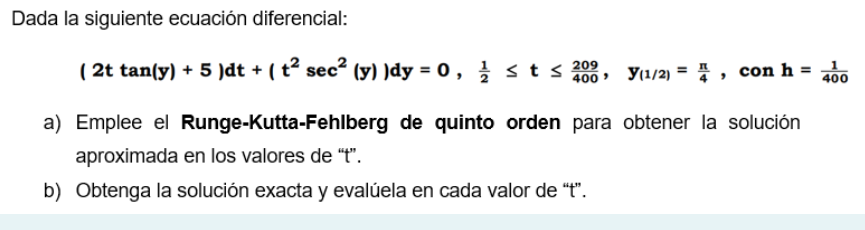

Despejo la derivada:
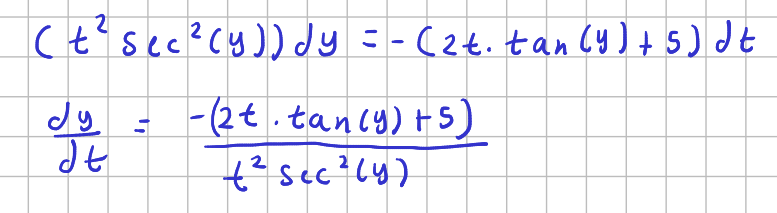

Y resuelvo en Python

In [13]:
from sympy import *
import numpy

fy = symbols("fy", cls=Function)
t, y = symbols("t y")

h = 1/400

eq = Eq(fy(t).diff(), - (2*t*tan(fy(t)) + 5) / (t**2 * (sec(fy(t)))**2) )
f = -(2*t * tan(y) + 5) / (t**2 * (sec(y))**2)

# creamos nuestro intervalo
T = [round(t, 5) for t in numpy.arange(start=0.5, stop=(209/400) + h/2, step=h)]
T

[0.5, 0.5025, 0.505, 0.5075, 0.51, 0.5125, 0.515, 0.5175, 0.52, 0.5225]

In [14]:
# Declaro la lista con y(0.5) = pi/4


Y = [pi/4]
K1 = [0]
K2 = [0]
K3 = [0]
K4 = [0]
K5 = [0]
K6 = [0]

# Hago un for para aplicar la fórmula
for i in range(1, len(T)):
    k1 = f.subs({t: T[i-1], y: Y[i-1]})
    k2 = f.subs({t: T[i-1] + 0.25*h, y: Y[i-1] + 0.25*h*k1})
    k3 = f.subs({t: T[i-1] + (3/8)*h, y: Y[i-1] + (3/32)*h*k1 + (9/32)*h*k2})
    k4 = f.subs({t: T[i-1] + (12/13)*h, y: Y[i-1] + (1932/2197)*h*k1 - (7200/2197)*h*k2 + (7296/2197)*h*k3})
    k5 = f.subs({t: T[i-1] + h, y: Y[i-1] + (439/216)*h*k1 - 8*h*k2 + (3680/513)*h*k3 - (845/4104)*h*k4})
    k6 = f.subs({t: T[i-1] + 0.5*h, y: Y[i-1] - (8/27)*h*k1 + 2*h*k2 - (3544/2565)*h*k3 + (1859/4104)*h*k4 - (11/40)*h*k5})
    K1.append(k1)
    K2.append(k2)
    K3.append(k3)
    K4.append(k4)
    K5.append(k5)
    K6.append(k6)
    Y.append(float(Y[i-1] + h*((16/135)*k1 + (6656/12825)*k3 + (28561/56430)*k4 - (9/50)*k5 + (2/55)*k6)))

Y

[pi/4,
 0.754783122568105,
 0.7229307179507701,
 0.6898372240166327,
 0.655509797537757,
 0.6199680653725476,
 0.5832456184479791,
 0.5453913150920358,
 0.5064702848234682,
 0.4665645188182558]

In [15]:
# como no fue posible resolver la EDI de forma simbólica, lo hacemos de forma 
# númerica con scipy
from scipy.integrate import solve_ivp

import numpy

def funcionEq(t, y): 
    return -(2*t * numpy.tan(y) + 5) / (t**2 * (1/numpy.cos(y))**2)

solucion = solve_ivp(funcionEq, (0.5, 209/400), [pi/4], t_eval=T)
solucion_exacta = []
for i in solucion.y[0]:
    solucion_exacta.append(float(i))
solucion_exacta

[0.7853981633974483,
 0.7547858101522111,
 0.722936543532379,
 0.6898429217679057,
 0.6555119944969106,
 0.6199653027656898,
 0.5832388790287047,
 0.5453832471485938,
 0.5064634223961604,
 0.4665589114503854]